In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

## 1. 图像基础

In [3]:
A = np.random.randint(0, 256, (2,4), dtype=np.uint8)
A

array([[210,  74,  86, 183],
       [135,  80,  77, 198]], dtype=uint8)

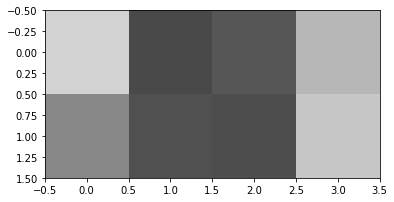

In [6]:
show(A)

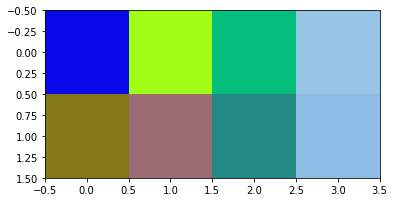

In [7]:
B = np.random.randint(0, 256, (2,4,3), dtype=np.uint8)
show(B)

In [8]:
np.uint8([-1, 0, 10, 255, 300])

array([255,   0,  10, 255,  44], dtype=uint8)

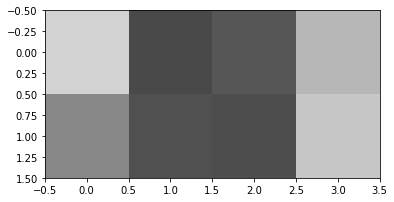

In [9]:
A2 = np.float32(A)
show(A2)

In [10]:
# 0-1 
A2 /= 255
A2

array([[0.8235294, 0.2901961, 0.3372549, 0.7176471],
       [0.5294118, 0.3137255, 0.3019608, 0.7764706]], dtype=float32)

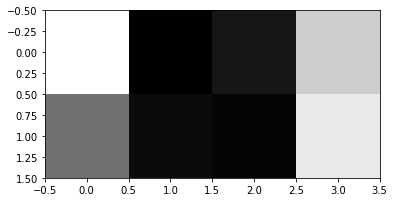

In [14]:
show(A2)

## 2. 通道的分离和合并

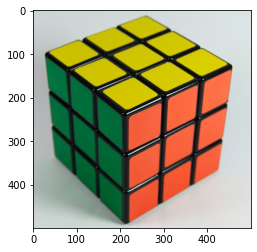

In [13]:
img = cv.imread('pic/cubic500x500.jpg')
show(img)

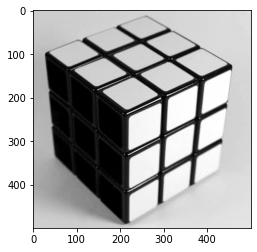

In [14]:
b, g, r = cv.split(img)
show(r)

In [17]:
r.shape

(500, 500)

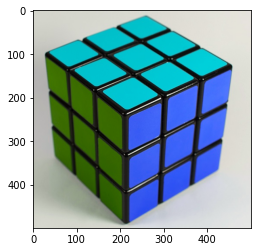

In [19]:
img2 = cv.merge([r, g, b])
show(img2)

## 3. 彩色图转换成灰度图

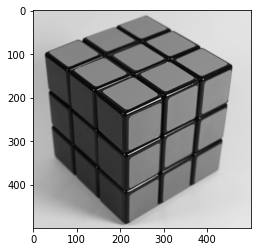

In [20]:
gray1 = 1/3*b + 1/3*g + 1/3*r
show(gray1)

In [22]:
gray2 = np.uint8(gray1)
gray2

array([[210, 210, 209, ..., 226, 226, 226],
       [209, 209, 209, ..., 226, 226, 225],
       [209, 209, 209, ..., 226, 226, 226],
       ...,
       [212, 212, 212, ..., 230, 230, 230],
       [212, 212, 212, ..., 230, 229, 229],
       [213, 212, 212, ..., 230, 229, 229]], dtype=uint8)

In [23]:
gray3 = gray1.astype(np.uint8)
gray3

array([[210, 210, 209, ..., 226, 226, 226],
       [209, 209, 209, ..., 226, 226, 225],
       [209, 209, 209, ..., 226, 226, 226],
       ...,
       [212, 212, 212, ..., 230, 230, 230],
       [212, 212, 212, ..., 230, 229, 229],
       [213, 212, 212, ..., 230, 229, 229]], dtype=uint8)

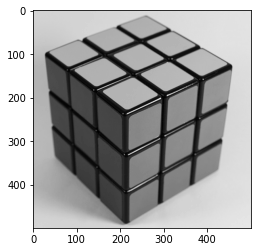

In [24]:
gray4 = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # convert two to 
show(gray4)

## 4. 图像二值化

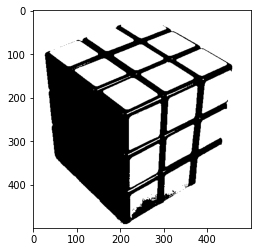

In [26]:
thresh = 125
gray4[gray4 > thresh] = 255
gray4[gray4 <= thresh] = 0
show(gray4)

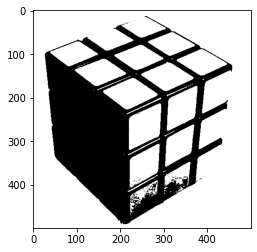

In [34]:
ignore, img_bin = cv.threshold(gray2, 125, 1, cv.THRESH_BINARY)
show(img_bin)

In [35]:
img_bin

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

## 5. 两图像的加减乘除

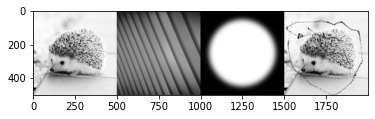

In [39]:
obj = cv.imread('pic/hedgehog500x500.jpg', 0)
bg  = cv.imread('pic/line500x500.jpg', 0)
mask  = cv.imread('pic/mask500x500.jpg', 0)
noise = cv.imread('pic/hedgehog_noise_500x500.jpg', 0)

show(np.hstack([obj, bg, mask, noise]))

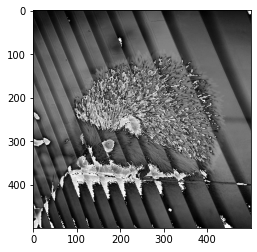

In [40]:
# 相加
img_add = obj + bg
show(img_add)

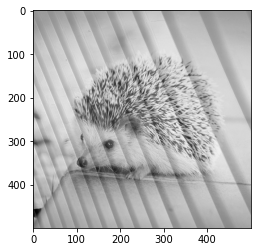

In [42]:
img_add = cv.add(obj*0.5, bg*0.5)
show(img_add)

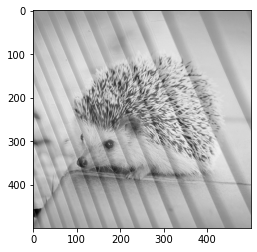

In [43]:
img_add2 = cv.addWeighted(obj, 0.5, bg, 0.5, 0)
show(img_add2)

In [44]:
img_add.dtype, img_add2.dtype

(dtype('float64'), dtype('uint8'))

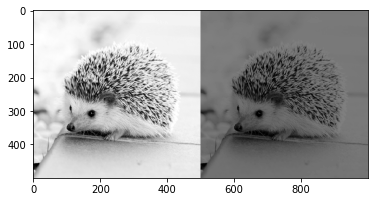

In [48]:
# 减法
img_sub = np.uint8((img_add - bg * 0.5)*2)
img_sub2 = cv.subtract(img_add, bg*0.5)

show(np.hstack([img_sub, img_sub2]))

In [51]:
# 乘法
mask = mask/255

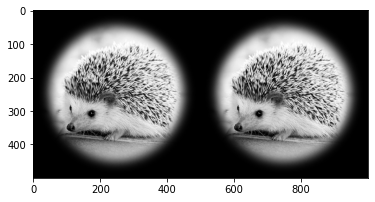

In [53]:
img_mul = obj * mask
img_mul2 = cv.multiply(obj*1.0, mask)

show(np.hstack([img_mul, img_mul2]))

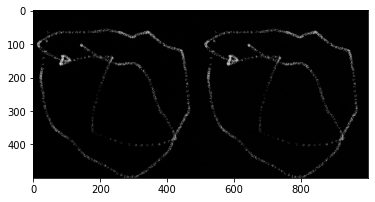

In [58]:
img_div = obj / (np.float64(noise) + 1)
img_div2 = cv.divide(obj, noise+1)

show(np.hstack([img_div, img_div2]))

## 6. 图像的线性和非线性变换

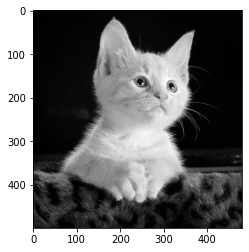

In [26]:
img = cv.imread('pic/cat500x480.jpg', 0)
show(img)

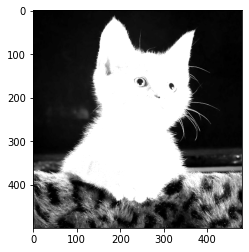

In [30]:
b = 20
k = 2
img2 = b + k * img.astype(np.int32)
img2 = np.clip(img2, 0, 255)
show(img2)

In [31]:
img2.max()

255

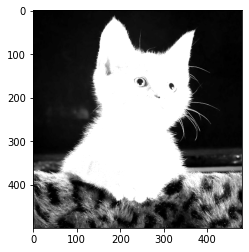

In [32]:
img3 = cv.convertScaleAbs(img, alpha=2, beta=20)

show(img3)

In [34]:
np.uint8([-1, 254, 255]) + 1

array([  0, 255,   0], dtype=uint8)

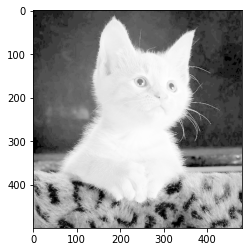

In [35]:
img4 = 10 + np.log(img.astype(np.float32) + 1) / 0.1

show(img4)

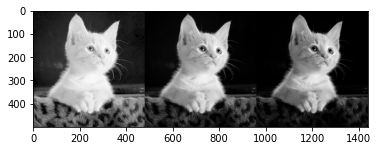

In [36]:
img01 = img / 255

img05 = np.power(img01, 0.5) * 255
img15 = np.power(img01, 1.5) * 255

show(np.hstack([img05, img, img15]))

## 7. 图像融合

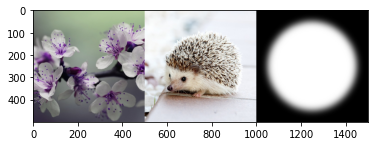

In [21]:
A = cv.imread('pic/petal500x500.jpg')
B = cv.imread('pic/hedgehog500x500.jpg')
M = cv.imread('pic/mask500x500.jpg')

show(np.hstack([A, B, M]))

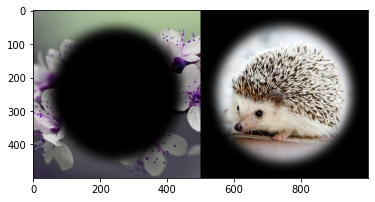

In [22]:
M = M / 255
As = A * (1 - M)
Bs = B * M

show(np.uint8(np.hstack([As, Bs])))

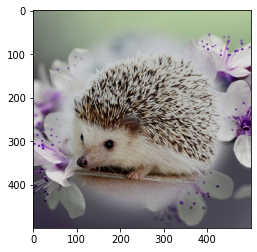

In [25]:
nice = As + Bs*0.8

show(nice.astype(np.uint8))

In [26]:
cv.imwrite('test/nice.jpg', nice)

True